## Task B: Recall
Veamos el recall por cada característica. Podremos obviar que efectivamente se marque la característica correcta


In [3]:
%load_ext autoreload
%autoreload 2

import glob
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import os

data_dir = "../data"

_train_path = os.path.join(data_dir, "train.json")
_test_path = os.path.join(data_dir, "test.json")


def serialize(article, comment, add_body):
    """
    Serializes article and comment
    """
    ret = comment.copy()
    ret["title"] = article["title"]
    ret["article_text"] = article["tweet_text"]
    if add_body:
        ret["body"] = article["body"]
    return ret



def load_datasets(train_path=None, test_path=None, add_body=False, limit=None, preprocess=True):
    """
    Load and return datasets

    Returns
    -------

        train_dataset, dev_dataset, test_datasets: datasets.Dataset
    """
    test_path = test_path or _test_path
    train_path = train_path or _train_path

    with open(train_path) as f:
        train_articles = json.load(f)

    with open(test_path) as f:
        test_articles = json.load(f)


    train_comments = [serialize(article, comment, add_body) for article in train_articles for comment in article["comments"]]
    test_comments = [serialize(article, comment, add_body) for article in test_articles for comment in article["comments"]]

    if limit:
        train_comments = train_comments[:limit]
        test_comments = test_comments[:limit]
    train_df = pd.DataFrame(train_comments)
    test_df = pd.DataFrame(test_comments)

    train_df, dev_df = train_test_split(train_df, test_size=0.2, random_state=20212021)

    return train_df, dev_df, test_df


train_df, dev_df, test_df = load_datasets(add_body=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Obs

`text` hace referencia al contexto del tweet del diario
`title` al título de la noticia (extraído del artículo)

In [4]:
import glob
import json

evaluations = {
}
for model_name, path in [
    ('none', "../evaluations/betonews_fine_none.json"),   
    ('tweet', "../evaluations/betonews_fine_text.json"),   
    ('tweet+body', "../evaluations/betonews_fine_body.json"),   
    ]:

    with open(path) as f:
        evaluations[model_name] = json.load(f)

for key, evals in evaluations.items():
    print(f"We have {len(evals['metrics'])} {key} evaluations")


We have 10 none evaluations
We have 10 tweet evaluations
We have 15 tweet+body evaluations


In [6]:
import numpy as np


hate_categories = [
    "WOMEN", # Against women
    "LGBTI", # Against LGBTI
    "RACISM", # Racist
    "CLASS",  # Classist
    "POLITICS", # Because of politics
    "DISABLED", # Against disabled
    "APPEARANCE",  # Against people because their appearance
    "CRIMINAL", # Against criminals
]

"""
Categories + CALLS (call for action)
"""
extended_hate_categories = ["CALLS"] + hate_categories

df = test_df.set_index("id")
df["HATEFUL"] = df[extended_hate_categories].any(1)

# for key in evaluations:
#     column_names = [f"{key}_{x}_pred" for x in extended_hate_categories]

#     df[column_names] = (np.array(evaluations[key]["predictions"]) > 0).mean(0)
#     df[f"{key}_HATEFUL_pred"] = df[column_names].any(1)

df

,text,HATEFUL,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,CALLS,original_text,title,article_text,body
id,,,,,,,,,,,,,,,
397703,[USER] Ojalá se funda y cague de hambre,False,0,0,0,0,0,0,0,0,0,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,Mora Godoy cierra su escuela de tango y remata...,Puede marcar con justeza la fecha de inicio de...
397704,[USER] Faltó que se enganchó al hijo de sofovi...,True,1,0,0,0,0,0,0,0,0,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,Mora Godoy cierra su escuela de tango y remata...,Puede marcar con justeza la fecha de inicio de...
397705,"[USER] y bue, que le vaya a llorar a Cristina ...",False,0,0,0,0,0,0,0,0,0,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,Mora Godoy cierra su escuela de tango y remata...,Puede marcar con justeza la fecha de inicio de...
397706,[USER] [USER] Jodete. Macri te hizo conocer a ...,False,0,0,0,0,0,0,0,0,0,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,Mora Godoy cierra su escuela de tango y remata...,Puede marcar con justeza la fecha de inicio de...
397707,"[USER] Que se joda, es su gobierno el que ella...",False,0,0,0,0,0,0,0,0,0,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,Mora Godoy cierra su escuela de tango y remata...,Puede marcar con justeza la fecha de inicio de...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361071,[USER] Con esa varita q no rompe un plato ni s...,False,0,0,0,0,0,0,0,0,0,@usuario Con esa varita q no rompe un plato ni...,Nahir Galarza sumó a una abogada feminista a s...,Nahir Galarza sumó a una abogada feminista a s...,"La defensa de Nahir Galarza, condenada el 3 de..."
361072,[USER] No las entiendo a estas pelotudas. Somo...,True,1,0,0,0,0,0,0,0,0,@usuario No las entiendo a estas pelotudas. So...,Nahir Galarza sumó a una abogada feminista a s...,Nahir Galarza sumó a una abogada feminista a s...,"La defensa de Nahir Galarza, condenada el 3 de..."
361073,[USER] Lo mató por qué es macho!,False,0,0,0,0,0,0,0,0,0,@usuario Lo mató por qué es macho!,Nahir Galarza sumó a una abogada feminista a s...,Nahir Galarza sumó a una abogada feminista a s...,"La defensa de Nahir Galarza, condenada el 3 de..."


## RECALL exacto

In [7]:
hate_categories, extended_hate_categories

(['WOMEN',
  'LGBTI',
  'RACISM',
  'CLASS',
  'POLITICS',
  'DISABLED',
  'APPEARANCE',
  'CRIMINAL'],
 ['CALLS',
  'WOMEN',
  'LGBTI',
  'RACISM',
  'CLASS',
  'POLITICS',
  'DISABLED',
  'APPEARANCE',
  'CRIMINAL'])

In [15]:
import pandas as pd
from sklearn.metrics import recall_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "recall": recall_score(df[characteristic], df_pred[characteristic])
            })

recall_df = pd.DataFrame(data)

recall_df

none
tweet
tweet+body


,context,characteristic,recall
0,none,WOMEN,0.283088
1,none,LGBTI,0.276923
2,none,RACISM,0.643299
3,none,CLASS,0.370861
4,none,POLITICS,0.529210
...,...,...,...
275,tweet+body,CLASS,0.463576
276,tweet+body,POLITICS,0.573883
277,tweet+body,DISABLED,0.581395
278,tweet+body,APPEARANCE,0.704485


In [16]:
translation = {
  'WOMEN': 'MUJER',
  'LGBTI': 'LGBTI',
  'RACISM': 'RACISMO',
  'CLASS': 'CLASE',
  'POLITICS': 'POLITICA',
  'DISABLED': 'DISCAPAC',
  'APPEARANCE': 'APARIENCIA',
  'CRIMINAL': 'CRIMINAL',
}
recall_df["characteristic"] = recall_df["characteristic"].apply(lambda x: translation[x])

recall_df

,context,characteristic,recall
0,none,MUJER,0.283088
1,none,LGBTI,0.276923
2,none,RACISMO,0.643299
3,none,CLASE,0.370861
4,none,POLITICA,0.529210
...,...,...,...
275,tweet+body,CLASE,0.463576
276,tweet+body,POLITICA,0.573883
277,tweet+body,DISCAPAC,0.581395
278,tweet+body,APARIENCIA,0.704485


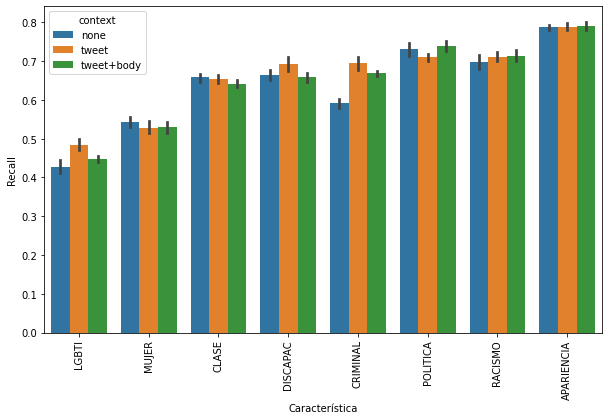

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
x_order = recall_df[recall_df.context == "tweet"].groupby("characteristic").mean().sort_values("recall").index

figsize = (10, 6)

plt.figure(figsize=figsize)

sns.barplot(x="characteristic", y="recall", hue="context", data=recall_df, order=x_order)

plt.xlabel("Característica")
plt.ylabel("Recall")

plt.xticks(rotation=90);
plt.savefig("imgs/exact_recall_barplot_es.pdf", bbox_inches="tight")

## REcall no exacto

none
tweet
tweet+body


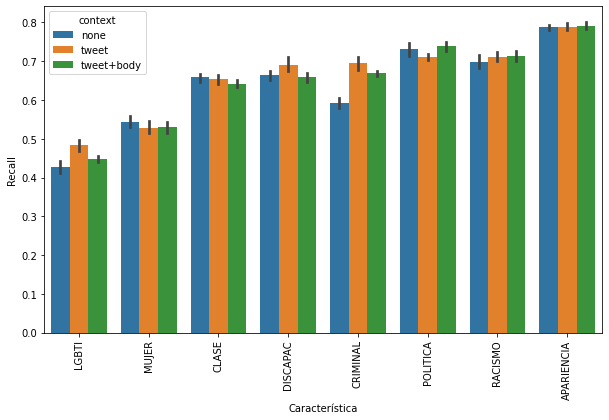

In [28]:
import pandas as pd
from sklearn.metrics import recall_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "recall": recall_score(df[characteristic], df_pred["HATEFUL"])
            })

recall_df = pd.DataFrame(data)

recall_df["characteristic"] = recall_df["characteristic"].apply(lambda x: translation[x])

x_order = recall_df[recall_df.context == "tweet"].groupby("characteristic").mean().sort_values("recall").index


plt.figure(figsize=figsize)



sns.barplot(x="characteristic", y="recall", hue="context", data=recall_df, order=x_order)

plt.xticks(rotation=90);
plt.xlabel("Característica")
plt.ylabel("Recall")
plt.savefig("imgs/hate_recall_barplot_es.pdf", bbox_inches="tight")

none
tweet
tweet+body


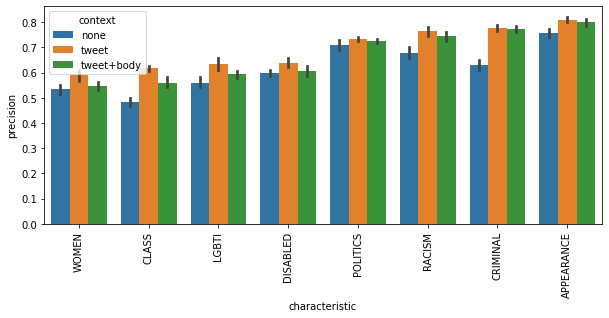

In [109]:
import pandas as pd
from hatedetection import hate_categories
from sklearn.metrics import precision_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "precision": precision_score(df[characteristic], df_pred[characteristic])
            })

precision_df = pd.DataFrame(data)

x_order = precision_df[precision_df.context == "tweet"].groupby("characteristic").mean().sort_values("precision").index

plt.figure(figsize=figsize)
plt.ylabel("precision")



sns.barplot(x="characteristic", y="precision", hue="context", data=precision_df, order=x_order)

plt.xticks(rotation=90);
plt.xlabel("Característica")
plt.savefig("imgs/precision_barplot.pdf", bbox_inches="tight")
